# **Loan Default Prediction**

# Executive Summary
The project sought to create a data-based solution for determining high-risk loan applicants before loan disbursement.Wm analyzed historical loan performance records through extensive exploratory data analysis to learn about applicant behaviors and determine which factors indicated loan risks. We performed testing and tuning operations on three classification models consisting of Logistic Regression and Decision Tree and Random Forest.The  1 analysis demonstrated that DEBTINC, DELINQ, DEROG and CL(negative correlation)AGE were proven to be reliable indicators for loan default. The analysis through EDA revealed that loan amounts and mortgage balances below average levels tended to result in higher default rates.

We chose a threshold-optimized Random Forest model following multiple metric-based model evaluation as our final solution. The model demonstrates a performance level of 91% accuracy alongside 84% precision and 68% recall accompanied by a ROC AUC of 0.96. The F1-score functions as our main assessment measure because it strikes the right balance between precision and recall for predicting defaults that entail significant financial risks and reputation damage. Threshold tuning was used to optimize the F1-score and ROC AUC evaluation provided additional assurance about model stabiliThe proposed work plan includes deployment of the model within the loan processing system while establishing performance tracking protocols and adding interpretability tools SHAP or PDPs for regulatory compl andnce.i
 continuous refineoverghout.time.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

## **Data Overview**

In [4]:
df=pd.read_csv("D://AData science//MIT Certificate//capstone//hmeq.csv")

In [5]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [6]:
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [7]:
df.shape

(5960, 13)

In [8]:
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [9]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [10]:
df.duplicated().sum()


0

## Summary Statistics

In [20]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [24]:
df.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [26]:
df['JOB'].value_counts()

JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64

In [28]:
df['REASON'].value_counts()

REASON
DebtCon    3928
HomeImp    1780
Name: count, dtype: int64

- Observations from Summary Statistics

## **Exploratory Data Analysis (EDA) and Visualization**

### **Univariate Analysis**


In [35]:
#1
col = 'LOAN'
print(f"{col} → Min: {df[col].min()}, Max: {df[col].max()}, Range: {df[col].max() - df[col].min()}")


LOAN → Min: 1100, Max: 89900, Range: 88800


The loan amounts span a wide range (from $1,100 to $89,900), indicating significant variability in applicant borrowing needs. This spread suggests the presence of potential outliers on the higher end, which could impact model sensitivity and requires attention during preprocessing.

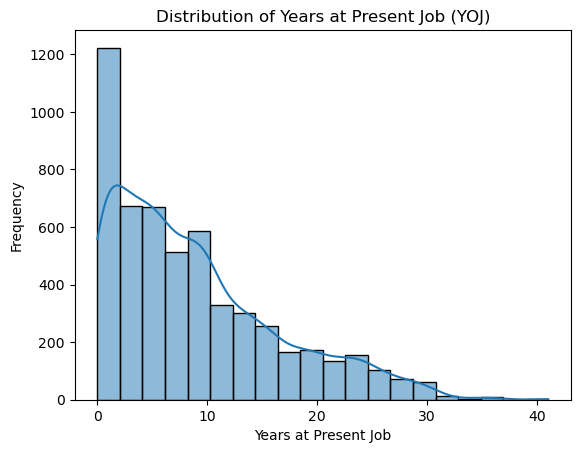

In [38]:
#2
sns.histplot(df['YOJ'].dropna(), bins=20, kde=True)
plt.title('Distribution of Years at Present Job (YOJ)')
plt.xlabel('Years at Present Job')
plt.ylabel('Frequency')
plt.show()


Most applicants who applied for a credit card showed less than 5 years working at their present job based on the right-skewed distribution of "YOJ". Employment instability appears common according to the significant number of applicants who report working less than five years. Right-skewed "YOJ" distributions affect the way creditworthiness models function along with their calibration methods.

In [41]:
#3
df['REASON'].nunique()

2

Home improvement projects and debt consolidation make up the two distinct application purposes among applicants demonstrated in data from the REASON variable. The application reasons fall into two distinct groups that may facilitate category-based assessment methods to reveal default-related tendencies.

In [44]:
#4
df['JOB'].value_counts(ascending=False).head(2)

JOB
Other      2388
ProfExe    1276
Name: count, dtype: int64

Among the values featured in the JOB variable "Other" represents the highest number at 2,388 observations. The broad classification category includes many undefined occupations that could generate analysis variability because it needs further differentiation.

### **Bivariate Analysis**

In [48]:
#5
# Cross-tab with proportions (row-wise)
pd.crosstab(df['REASON'], df['BAD'], normalize='index')


BAD,0,1
REASON,,
DebtCon,0.810336,0.189664
HomeImp,0.777528,0.222472


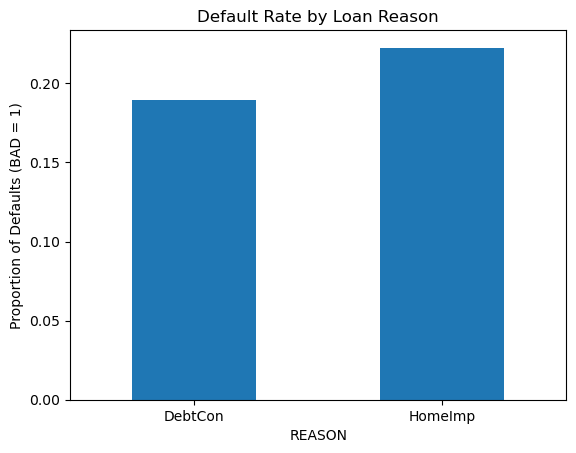

In [50]:
reason_default_rate = df.groupby('REASON')['BAD'].mean()

reason_default_rate.plot(kind='bar')
plt.ylabel('Proportion of Defaults (BAD = 1)')
plt.title('Default Rate by Loan Reason')
plt.xticks(rotation=0)
plt.show()


In [52]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['REASON'], df['BAD'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-squared test p-value: {p}")


Chi-squared test p-value: 0.004576181950707232


Statistical analysis confirms REASON of loan to default rate as a significant link. The seemingly small default rate discrepancy observed between Home Improvement and Debt Consolidation loans shows statistical significance according to the Chi-squared test (p-value 0.0046) indicating loan purpose as a possible factor in default risk.

In [55]:
#6
df.groupby('BAD')['LOAN'].mean()


BAD
0    19028.107315
1    16922.119428
Name: LOAN, dtype: float64

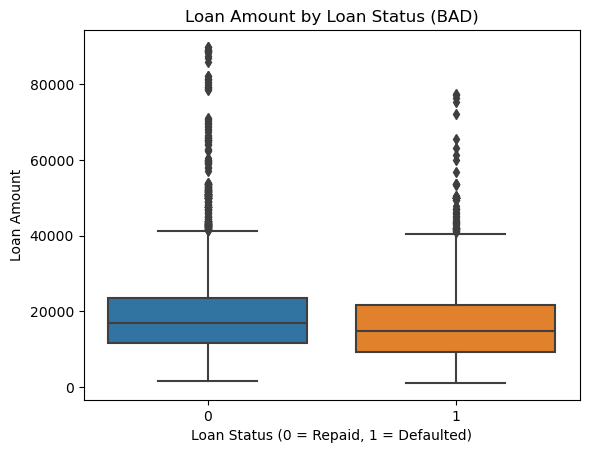

In [56]:
sns.boxplot(data=df, x='BAD', y='LOAN')
plt.title('Loan Amount by Loan Status (BAD)')
plt.xlabel('Loan Status (0 = Repaid, 1 = Defaulted)')
plt.ylabel('Loan Amount')
plt.show()


In [59]:
from scipy.stats import ttest_ind

# Separate the groups
loan_defaulted = df[df['BAD'] == 1]['LOAN'].dropna()
loan_repaid = df[df['BAD'] == 0]['LOAN'].dropna()

# Run the independent t-test
t_stat, p_val = ttest_ind(loan_defaulted, loan_repaid, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat}, p-value: {p_val}")


T-statistic: -5.720042746865789, p-value: 1.2455336996284883e-08


Statistically significant evidence shows that borrowers who defaulted took out smaller loan amounts than those who successfully repaid their debt according to the t-test p-value (< 0.00001). A very small yet statistically significant difference exists between loan sizes as measured by the p-value of < 0.00001 which demonstrates default likelihood has a detectable yet mild relationship with loan size.

In [62]:
#7
df.groupby('BAD')['VALUE'].mean()


BAD
0    102595.921018
1     98172.846227
Name: VALUE, dtype: float64

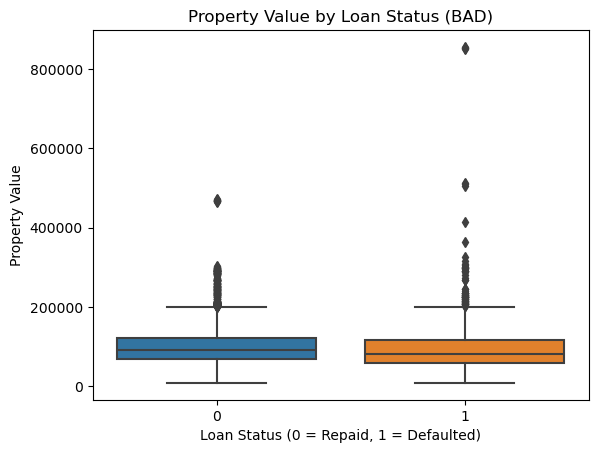

In [66]:
sns.boxplot(data=df, x='BAD', y='VALUE')
plt.title('Property Value by Loan Status (BAD)')
plt.xlabel('Loan Status (0 = Repaid, 1 = Defaulted)')
plt.ylabel('Property Value')
plt.show()


In [68]:
from scipy.stats import ttest_ind

value_defaulted = df[df['BAD'] == 1]['VALUE'].dropna()
value_repaid = df[df['BAD'] == 0]['VALUE'].dropna()

t_stat, p_val = ttest_ind(value_defaulted, value_repaid, equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {p_val}")


T-statistic: -1.8555201736805258, p-value: 0.06374121434610379


Records show that property values demonstrate no statistically important relationship with home loan defaults. The difference in property value between defaulters and non-defaulters does not reach statistical significance according to the t-test results with a p-value at 0.0637.

In [71]:
#8
df.groupby('BAD')['MORTDUE'].mean()


BAD
0    74829.249055
1    69460.452973
Name: MORTDUE, dtype: float64

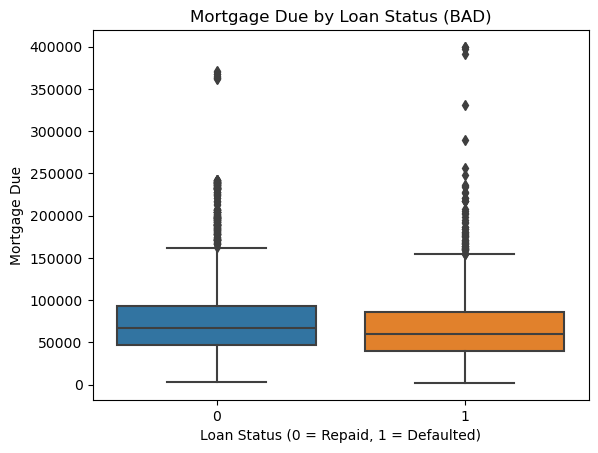

In [73]:
sns.boxplot(data=df, x='BAD', y='MORTDUE')
plt.title('Mortgage Due by Loan Status (BAD)')
plt.xlabel('Loan Status (0 = Repaid, 1 = Defaulted)')
plt.ylabel('Mortgage Due')
plt.show()


In [75]:

from scipy.stats import ttest_ind

mort_defaulted = df[df['BAD'] == 1]['MORTDUE'].dropna()
mort_repaid = df[df['BAD'] == 0]['MORTDUE'].dropna()

t_stat, p_val = ttest_ind(mort_defaulted, mort_repaid, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")


T-statistic: -3.38, p-value: 0.0007


A statistical analysis established mortgage amounts show an evident variation between mortgage defaulters and non-defaulters. The analysis through the t-test produced a p-value of 0.0007 below 0.05 which establishes that the difference exists beyond random occurrences. The average mortgage balance for defaulters remained consistently lower than the mortgage balance of repaying homeowners.

### **Multivariate Analysis**

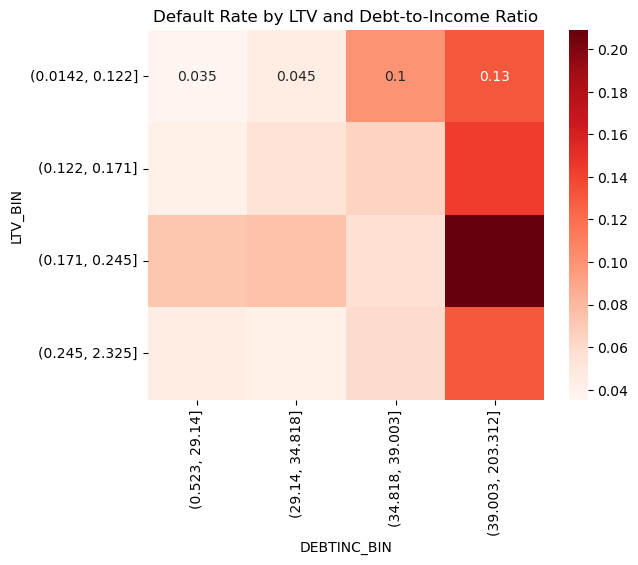

In [79]:
#Hypothesis: Applicants with both high LTV and high debt-to-income (DEBTINC) are more likely to default.
df['LTV'] = df['LOAN'] / df['VALUE']
df['LTV_BIN'] = pd.qcut(df['LTV'], 4)
df['DEBTINC_BIN'] = pd.qcut(df['DEBTINC'], 4)

pivot = df.pivot_table(index='LTV_BIN', columns='DEBTINC_BIN', values='BAD', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='Reds')
plt.title('Default Rate by LTV and Debt-to-Income Ratio')
plt.show()


we can see most of the variation happens on the DEBTINC axis, cells are getting darker as we go right, indicating debt-to-income ratio has a stronger impact on default probability in this interaction.

In [96]:
df['VALUE_BIN'] = pd.qcut(df['VALUE'], 4)
df['DEBTINC_BIN'] = pd.qcut(df['DEBTINC'], 4)


<Axes: xlabel='DEBTINC_BIN', ylabel='VALUE_BIN'>

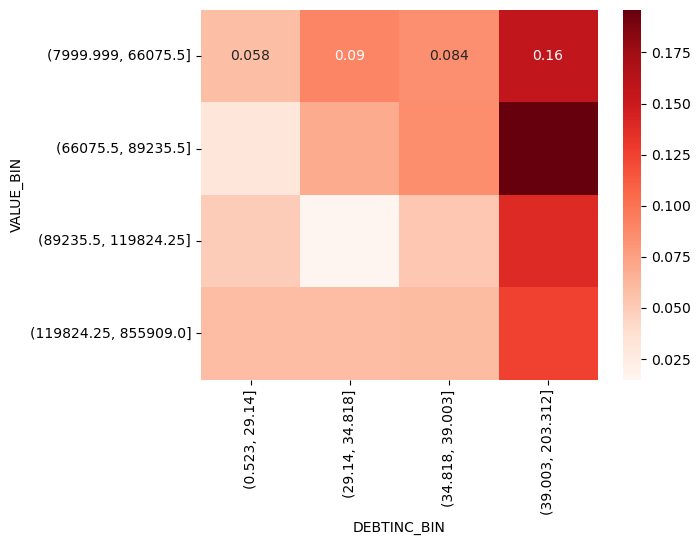

In [98]:
heatmap_data = df.pivot_table(index='VALUE_BIN', columns='DEBTINC_BIN', values='BAD')
sns.heatmap(heatmap_data, annot=True, cmap='Reds')


if we fix any bin, on the DEBTINC axis, we can see colors getting darker therefore DEBTINC increases the probability to default as it is increased.

Text(0.5, 0.98, 'Default Rate by Years on Job (YOJ) Across Job Types')

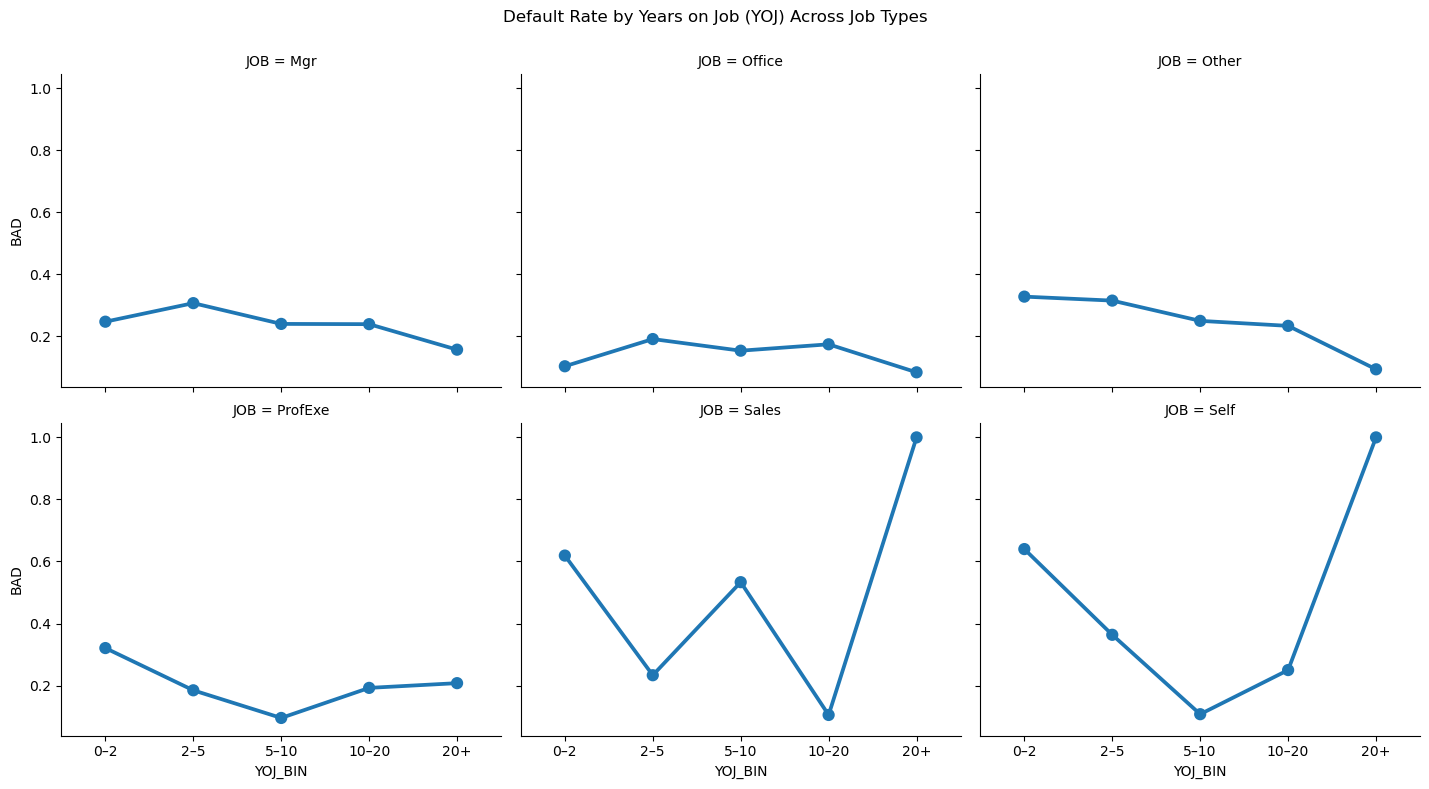

In [82]:
#Are certain job types more likely to default when they also have short employment history?
import seaborn as sns

# Ensure YOJ_BIN is a category with a clear order
df['YOJ_BIN'] = pd.cut(df['YOJ'], bins=[0, 2, 5, 10, 20, np.inf],
                       labels=['0–2', '2–5', '5–10', '10–20', '20+'])

# Prepare average default rate per bin per job
grouped = df.groupby(['JOB', 'YOJ_BIN'])['BAD'].mean().reset_index()

# Faceted line plots (trend lines)
sns.catplot(data=grouped, x='YOJ_BIN', y='BAD', col='JOB', kind='point',
            col_wrap=3, height=4, aspect=1.2)

plt.subplots_adjust(top=0.9)
plt.suptitle('Default Rate by Years on Job (YOJ) Across Job Types')


The interaction between job type and years at present job (YOJ) reveals clear risk variation across categories.

Default risk shows inconsistency among sales employees and self-employed workers because their likelihood to default follows a double peak with Sales showing a W pattern and Self having a U pattern.

Employed professionals working in Mgr, Office and Other categories demonstrate lower or declining default rates across time since employment because their secure employment conditions seem to reduce risk factors.

The default rates in ProfExe slightly in after 10 years at the jobcrease while staying at a low overall lyears 5 to 10 always seem to be a turning point especially for the jobs with relatively volatile default rate.evel.

Strategic risk assessment requires specific adaptation for different jobs along with employee duration in the company.

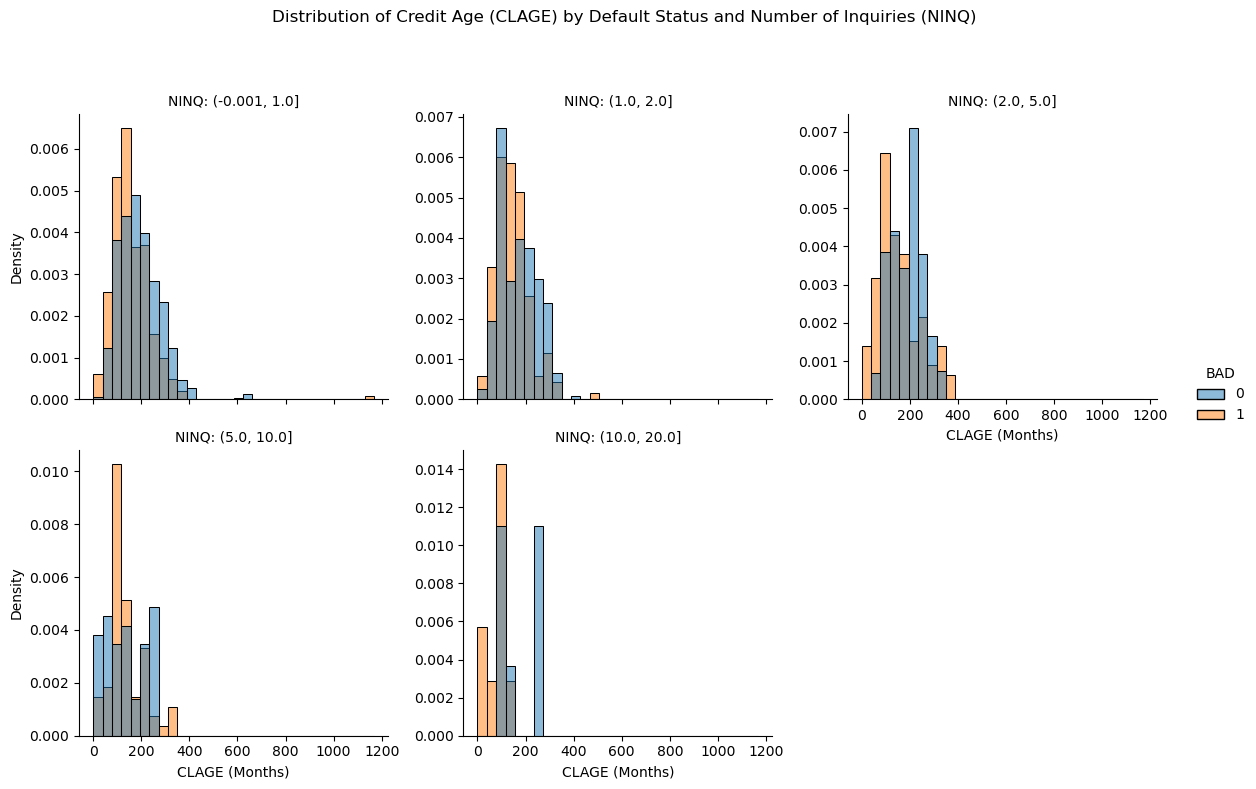

In [84]:
#Are people with long credit history but lots of new inquiries more likely to default?
df['NINQ_BIN'] = pd.cut(df['NINQ'], bins=[0, 1, 2, 5, 10, 20], include_lowest=True)

# Plot histograms of CLAGE, separated by NINQ_BIN, colored by BAD
g = sns.displot(data=df, x='CLAGE', hue='BAD', col='NINQ_BIN',
                bins=30, stat='density', common_norm=False,
                facet_kws={'sharey': False, 'sharex': True}, height=4, col_wrap=3)

g.set_titles("NINQ: {col_name}")
g.set_axis_labels("CLAGE (Months)", "Density")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Distribution of Credit Age (CLAGE) by Default Status and Number of Inquiries (NINQ)")
plt.show()


The analysis shows that combined use of CLAGE and NINQ variables influences default probability levels. The defaulter group continues to outnumber the group with positive payment history when CLAGE levels remain low while both types of borrowers reach maximum numbers at similar mid-range CLAGE points. Research shows that consumers with lengthy credit periods experience decreased risk even when borrowers with brief credit records accumulate multiple recent inquiries will default more often. 

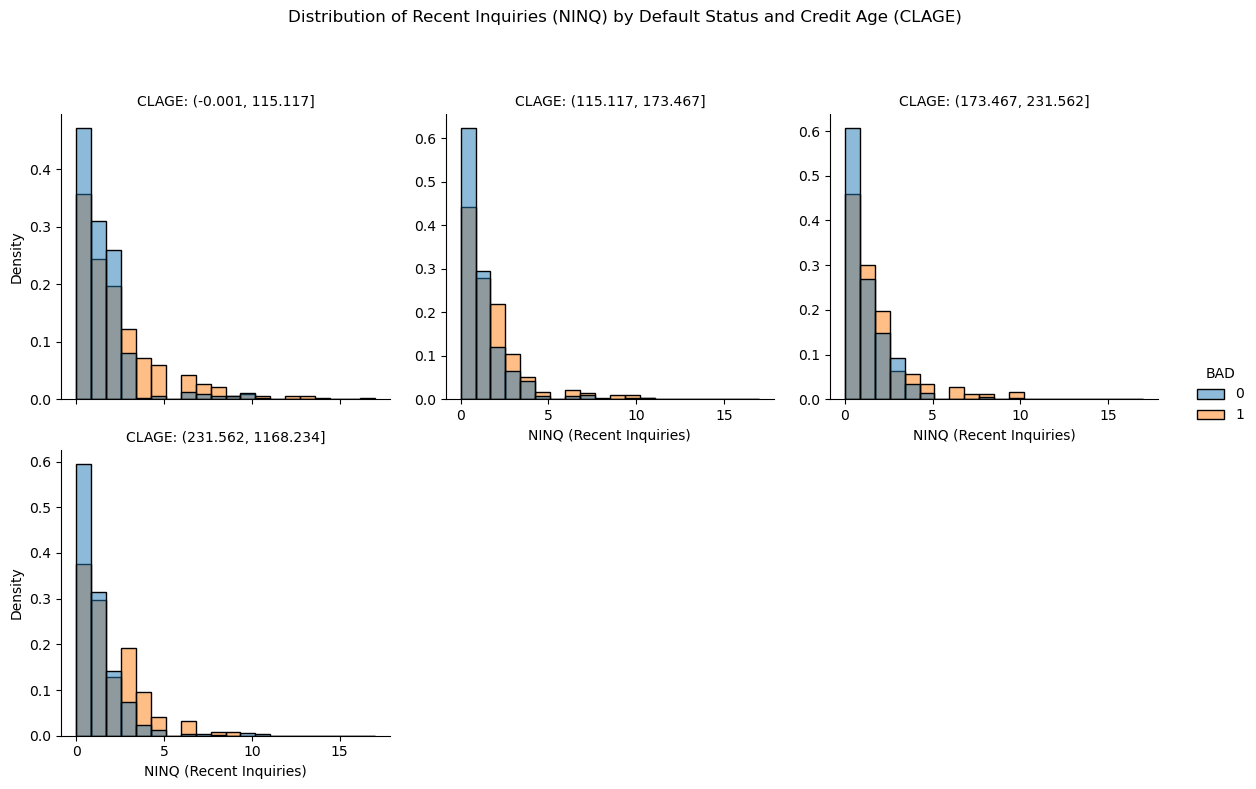

In [88]:
# Step 1: Create bins for CLAGE (credit age in months)
df['CLAGE_BIN'] = pd.qcut(df['CLAGE'], 4)  # Quartiles

# Step 2: Faceted histograms of NINQ colored by BAD, separated by CLAGE_BIN
g = sns.displot(
    data=df,
    x='NINQ',
    hue='BAD',
    col='CLAGE_BIN',
    bins=20,
    stat='density',
    common_norm=False,
    facet_kws={'sharey': False, 'sharex': True},
    height=4,
    col_wrap=3
)

g.set_titles("CLAGE: {col_name}")
g.set_axis_labels("NINQ (Recent Inquiries)", "Density")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Distribution of Recent Inquiries (NINQ) by Default Status and Credit Age (CLAGE)")
plt.show()


Increasing recent inquiries leads to larger numbers of default behavior despite a reduction in total applicant numbers. Although loans occur infrequently after a certain point of NINQ they are strongly associated with borrowers who default thus NINQ represents a significant risk factor for credit assessment.

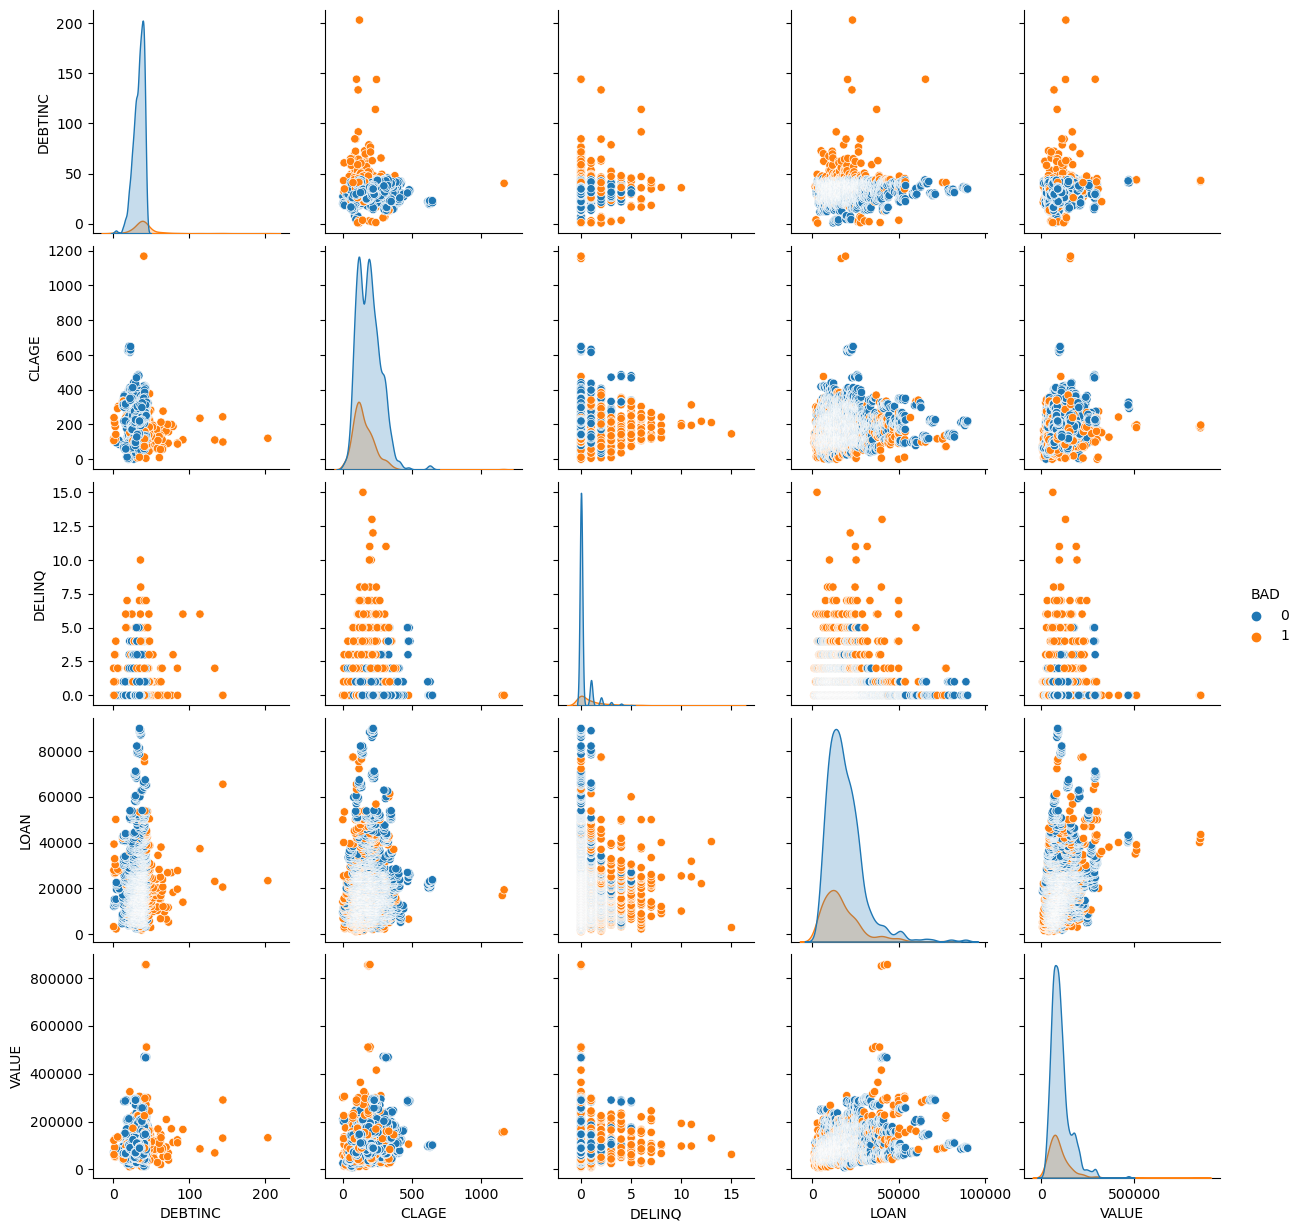

In [120]:
pairplot=sns.pairplot(df, vars=['DEBTINC', 'CLAGE', 'DELINQ', 'LOAN', 'VALUE'], hue='BAD')


In [124]:
import os
os.chdir('D://AData science//MIT Certificate//capstone')

In [126]:
pairplot.savefig("pairplot_image.png", dpi=300, bbox_inches='tight')

From pair plots, the effect of debt to income ratio and number of delinquent credit lines is evident. More loaners default as these two variables increase

<Axes: >

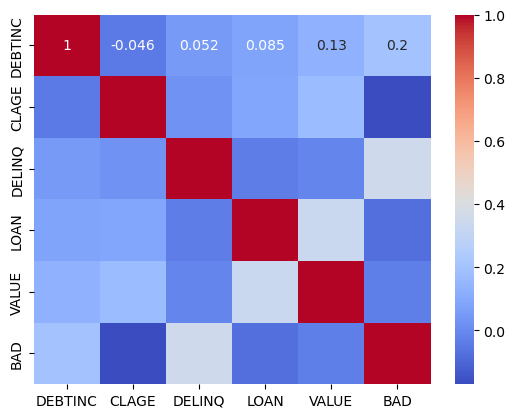

In [107]:
sns.heatmap(df[['DEBTINC', 'CLAGE', 'DELINQ', 'LOAN', 'VALUE', 'BAD']].corr(), annot=True, cmap='coolwarm')


Both loan amount and age of credit line have negative correlation with default rate. loan having a negative correlation is justified when we looka t the positive correlation between property value and loan. Default rate shows a clear positive correlation with debt to income ratio and number of delinquent credit lines

In [318]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LTV,LTV_BIN,DEBTINC_BIN,YOJ_BIN,NINQ_BIN,CLAGE_BIN
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,0.028187,"(0.0142, 0.122]",NaN,10–20,"(-0.001, 1.0]","(-0.001, 115.117]"
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,0.019006,"(0.0142, 0.122]",NaN,5–10,"(-0.001, 1.0]","(115.117, 173.467]"
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,0.089820,"(0.0142, 0.122]",NaN,2–5,"(-0.001, 1.0]","(115.117, 173.467]"
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,0.015179,"(0.0142, 0.122]",NaN,2–5,"(-0.001, 1.0]","(-0.001, 115.117]"


In [320]:
df.drop(columns=['LTV','LTV_BIN',	'DEBTINC_BIN',	'YOJ_BIN',	'NINQ_BIN',	'CLAGE_BIN'], inplace=True)


## Treating Outliers

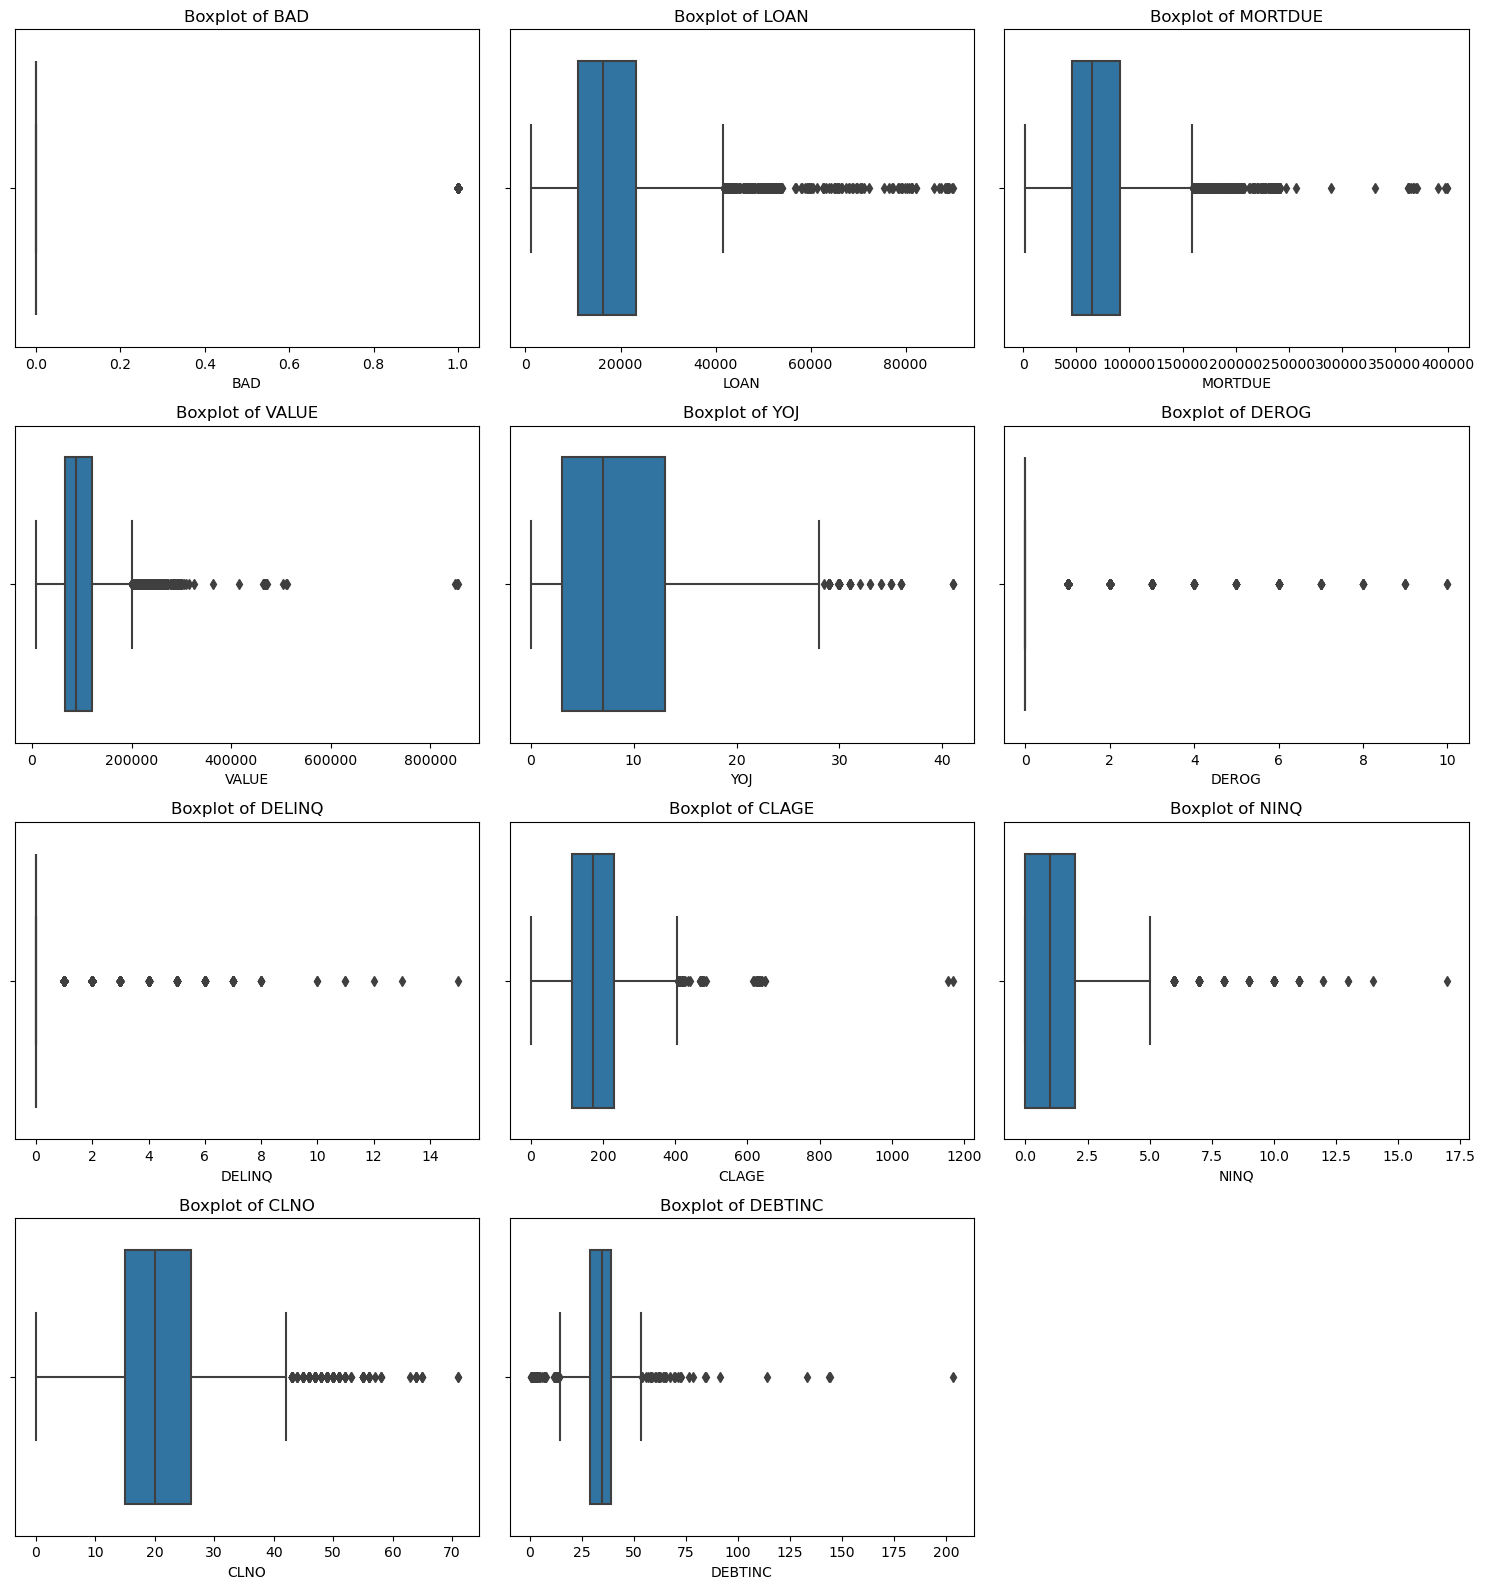

In [322]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
import math

n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

for i, col in enumerate(numeric_cols):
    r, c = divmod(i, n_cols)
    sns.boxplot(data=df, x=col, ax=axes[r][c])
    axes[r][c].set_title(f'Boxplot of {col}')

# Remove empty subplots
for j in range(i + 1, n_rows * n_cols):
    r, c = divmod(j, n_cols)
    fig.delaxes(axes[r][c])

plt.tight_layout()
plt.show()


In [324]:
import numpy as np
import pandas as pd
#for logistic regression only
# Start with a fresh copy
df_logistic = df.copy()

# ---------------------------
# 1. Cap at 99th percentile for sensitive continuous variables
for col in ['LOAN', 'MORTDUE', 'VALUE', 'DEBTINC']:
    cap = df_logistic[col].quantile(0.99)
    df_logistic[col] = np.where(df_logistic[col] > cap, cap, df_logistic[col])



# ---------------------------
# 3.clipping
df_logistic['DEROG'] = np.clip(df_logistic['DEROG'], 0, 3)
df_logistic['DELINQ'] = np.clip(df_logistic['DELINQ'], 0, 5)
df_logistic['NINQ'] = np.clip(df_logistic['NINQ'], 0, 8)



In [326]:
df_logistic.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [328]:
# for decision tree and random forest which are less sensitive to outliers
df_tree = df.copy()

# Only clip if data is clearly impossible
cap = df_tree['DEBTINC'].quantile(0.99)
df_tree['DEBTINC'] = np.where(df_tree['DEBTINC'] > cap, cap, df_tree['DEBTINC'])

df_tree['NINQ'] = np.clip(df_tree['NINQ'], 0, 8)

## Treating Missing Values

In [330]:
df_logistic.isnull().sum().sort_values(ascending=False)


DEBTINC    1267
DEROG       708
DELINQ      580
MORTDUE     518
YOJ         515
NINQ        510
CLAGE       308
JOB         279
REASON      252
CLNO        222
VALUE       112
BAD           0
LOAN          0
dtype: int64

In [334]:
# Numeric columns
numeric_to_fill = ['DEBTINC', 'YOJ', 'DEROG', 'DELINQ', 'MORTDUE', 'NINQ', 'CLAGE', 'CLNO', 'VALUE']
for col in numeric_to_fill:
    df_logistic[col] = df_logistic[col].fillna(df_logistic[col].median())

# Categorical columns
categorical_to_fill = ['JOB', 'REASON']
for col in categorical_to_fill:
    df_logistic[col] = df_logistic[col].fillna(df_logistic[col].mode()[0])


In [338]:
# Numeric columns
numeric_to_fill = ['DEBTINC', 'YOJ', 'DEROG', 'DELINQ', 'MORTDUE', 'NINQ', 'CLAGE', 'CLNO', 'VALUE']
for col in numeric_to_fill:
    df_tree[col] = df_tree[col].fillna(df_tree[col].median())

# Categorical columns
categorical_to_fill = ['JOB', 'REASON']
for col in categorical_to_fill:
    df_tree[col] = df_tree[col].fillna(df_tree[col].mode()[0])


## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

Default Rate Overall

Applicants with defaulted loans comprised about 20% of the total applicants thus creating a class skew.

Loan Amount (LOAN)

Personnel taking smaller loans default more regularly than expected although loan size poses a higher perceived risk to lenders.

The difference is statistically significant.

Property Value (VALUE)

The properties of defaulters show slightly reduced value compared to other applicants.

Statistically speaking (p ≈ 0.06) the differences between these factors remain uncertain.

Mortgage Due (MORTDUE)

The average mortgage balance of defaulters remains lower than recently originated.

Debt-to-Income Ratio (DEBTINC) and LTV

When DEBTINC values retsgh levels defauls that are also elevated.

The default risk fulfillment assessment in the heatmap demonstrates that DEBTINC represents a vital measure for

Delinq
number of delinquent credit lines has a signidicant effect in increasing probability to default as it increases. risk assessment models.

Recent Credit Inquiries (NINQ)

The risk of default rises when borrowers perimeframe of shorter credit age.

The indicators suggest financial instability or borrowed large amounts at risk.

Credit History Length (CLAGE)

The length of time someone maintains good credit relations reliably leads to reduced instances of loan defaults.

People who default from payments use recently created credit lines.

Employment Tenure (YOJ)

The likelihood of default among applicanis shortmployment period does not exceed two years.

The risk levels are highest together with volatility for Sales employees and independent contractors.

Loan Purpose (REASON)

The default rate stands higher among applicants who borrow for home improvement as compared to those who consolidate debt.

This relationship is statistically significant.

Job Role (JOB)

People employed as managers and in professional executive positio"sales" or nent lower risk and spread compared to those in "Other self-employed" roles.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Logistic Regression

In [340]:
#splitting features and labels
X = df_logistic.drop(columns=['BAD'])  # Features
y = df_logistic['BAD']                 # Target


In [342]:
#transforming categorical
X = pd.get_dummies(X, drop_first=True)


In [348]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [350]:
#sanity check
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Class balance in y_train:", y_train.value_counts(normalize=True))


Training set size: (4768, 16)
Test set size: (1192, 16)
Class balance in y_train: BAD
0    0.800545
1    0.199455
Name: proportion, dtype: float64


In [352]:
#build the model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline: scale → logistic regression
log_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42))
])


In [354]:
log_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [418]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict
y_pred_tr = log_pipeline.predict(X_train)
y_proba_tr = log_pipeline.predict_proba(X_train)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_tr))
print("\nClassification Report:\n", classification_report(y_train, y_pred_tr))
print("ROC AUC Score:", roc_auc_score(y_train, y_proba_tr))

Confusion Matrix:
 [[3682  135]
 [ 639  312]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      3817
           1       0.70      0.33      0.45       951

    accuracy                           0.84      4768
   macro avg       0.78      0.65      0.68      4768
weighted avg       0.82      0.84      0.81      4768

ROC AUC Score: 0.814434676678879


In [412]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict
y_pred = log_pipeline.predict(X_test)
y_proba = log_pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[916  38]
 [160  78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       954
           1       0.67      0.33      0.44       238

    accuracy                           0.83      1192
   macro avg       0.76      0.64      0.67      1192
weighted avg       0.82      0.83      0.81      1192

ROC AUC Score: 0.7586059581065131


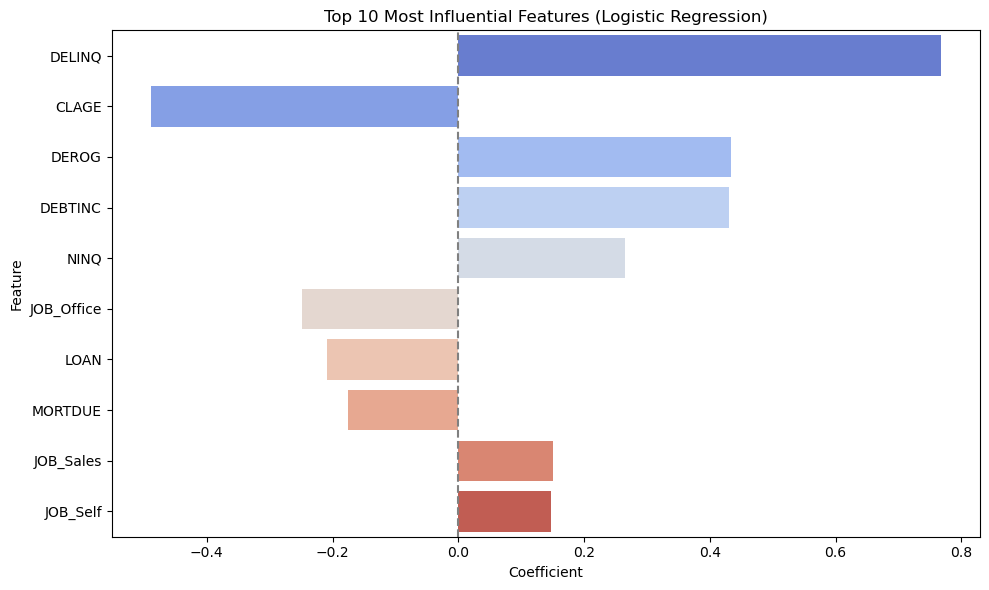

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame of features and coefficients
feature_names = X.columns
coefs = log_pipeline.named_steps['logreg'].coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Plot top N (e.g., 10)
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(top_n), y='Feature', x='Coefficient', palette='coolwarm')

plt.title(f"Top {top_n} Most Influential Features (Logistic Regression)")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


In [398]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)


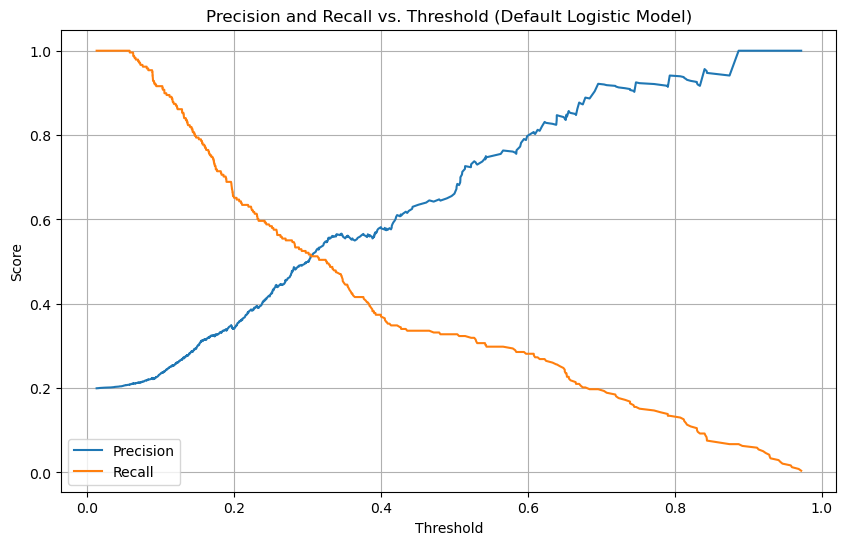

In [400]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold (Default Logistic Model)")
plt.legend()
plt.grid(True)
plt.show()


In [402]:
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold by F1 score: {best_threshold:.3f}")


Best threshold by F1 score: 0.324


In [420]:
y_pred_custom_tr = (y_proba_tr >= best_threshold).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_custom_tr))
print("\nClassification Report:\n", classification_report(y_train, y_pred_custom_tr))
print("F1 Score (Custom Threshold):", f1_score(y_train, y_pred_custom_tr))

print("ROC AUC Score:", roc_auc_score(y_train, y_proba_tr))

Confusion Matrix:
 [[3446  371]
 [ 465  486]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      3817
           1       0.57      0.51      0.54       951

    accuracy                           0.82      4768
   macro avg       0.72      0.71      0.71      4768
weighted avg       0.82      0.82      0.82      4768

F1 Score (Custom Threshold): 0.5376106194690266
ROC AUC Score: 0.814434676678879


In [422]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

y_pred_custom = (y_proba >= best_threshold).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))
print("F1 Score (Custom Threshold):", f1_score(y_test, y_pred_custom))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[865  89]
 [129 109]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       954
           1       0.55      0.46      0.50       238

    accuracy                           0.82      1192
   macro avg       0.71      0.68      0.69      1192
weighted avg       0.81      0.82      0.81      1192

F1 Score (Custom Threshold): 0.5
ROC AUC Score: 0.7586059581065131


In [465]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

log_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42))
])

param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2']
}

grid_log = GridSearchCV(
    estimator=log_pipe,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_log.fit(X_train, y_train)
best_log = grid_log.best_estimator_

print("✅ Best Hyperparameters:", grid_log.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Best Hyperparameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2'}


In [467]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train set
y_train_pred = best_log.predict(X_train)
y_train_proba = best_log.predict_proba(X_train)[:, 1]

# Test set
y_test_pred = best_log.predict(X_test)
y_test_proba = best_log.predict_proba(X_test)[:, 1]

print("\n📘 Logistic - Train Performance")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print("ROC AUC (Train):", roc_auc_score(y_train, y_train_proba))

print("\n📗 Logistic - Test Performance")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("ROC AUC (Test):", roc_auc_score(y_test, y_test_proba))



📘 Logistic - Train Performance
[[3684  133]
 [ 653  298]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      3817
           1       0.69      0.31      0.43       951

    accuracy                           0.84      4768
   macro avg       0.77      0.64      0.67      4768
weighted avg       0.82      0.84      0.81      4768

ROC AUC (Train): 0.8150082356120593

📗 Logistic - Test Performance
[[915  39]
 [160  78]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       954
           1       0.67      0.33      0.44       238

    accuracy                           0.83      1192
   macro avg       0.76      0.64      0.67      1192
weighted avg       0.81      0.83      0.81      1192

ROC AUC (Test): 0.7571877807726863


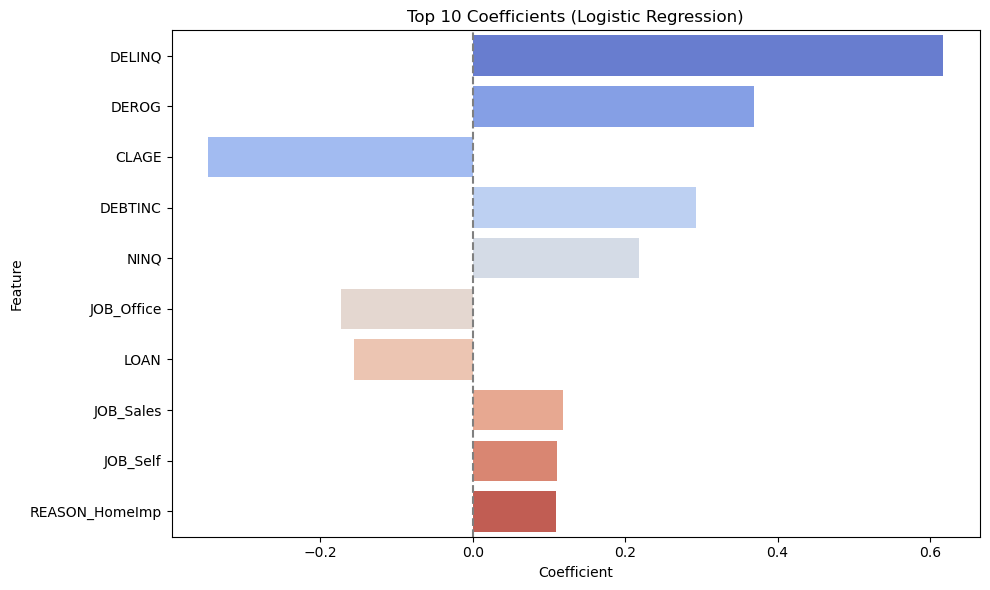

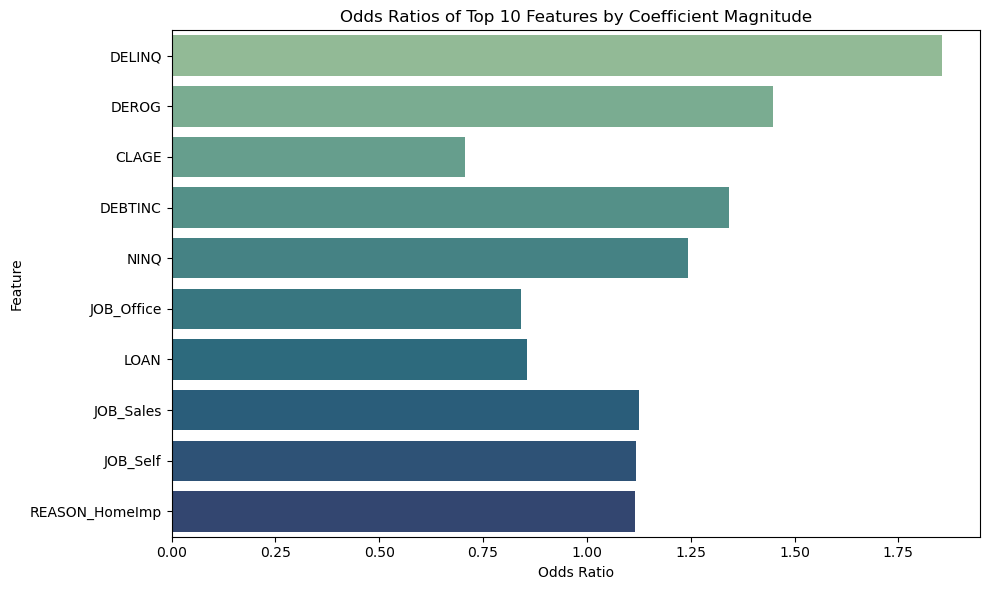

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X_train.columns
coefs = best_log.named_steps['logreg'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs,
    'Odds Ratio': odds,
    'AbsCoeff': np.abs(coefs)
}).sort_values(by='AbsCoeff', ascending=False)

# Plot Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(10), y='Feature', x='Coefficient', palette='coolwarm')
plt.title("Top 10 Coefficients (Logistic Regression)")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# Plot Odds Ratios
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(10), y='Feature', x='Odds Ratio', palette='crest')
plt.title("Odds Ratios of Top 10 Features by Coefficient Magnitude"
)
plt.tight_layout()
plt.show()


In [471]:
def tune_threshold_and_evaluate(model, X_train, y_train, X_test, y_test, model_name="Model"):
    from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix, roc_auc_score

    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    precision, recall, thresholds = precision_recall_curve(y_train, y_train_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]

    print(f"\n🎯 Best Threshold (F1) for {model_name}: {best_threshold:.3f}")

    def evaluate(y_true, y_pred, y_proba, split):
        print(f"\n📘 {model_name} - {split} Performance")
        print(confusion_matrix(y_true, y_pred))
        print(classification_report(y_true, y_pred))
        print("ROC AUC:", roc_auc_score(y_true, y_proba))
        print("F1 Score:", f1_score(y_true, y_pred))

    # Apply threshold
    y_train_pred = (y_train_proba >= best_threshold).astype(int)
    y_test_pred = (y_test_proba >= best_threshold).astype(int)

    # Evaluation
    evaluate(y_train, y_train_pred, y_train_proba, "Train")
    evaluate(y_test, y_test_pred, y_test_proba, "Test")

    return best_threshold


In [473]:
log_threshold = tune_threshold_and_evaluate(
    best_log,
    X_train, y_train,
    X_test, y_test,
    model_name="Tuned Logistic Regression"
)



🎯 Best Threshold (F1) for Tuned Logistic Regression: 0.293

📘 Tuned Logistic Regression - Train Performance
[[3305  512]
 [ 386  565]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3817
           1       0.52      0.59      0.56       951

    accuracy                           0.81      4768
   macro avg       0.71      0.73      0.72      4768
weighted avg       0.82      0.81      0.82      4768

ROC AUC: 0.8150082356120593
F1 Score: 0.5571992110453649

📘 Tuned Logistic Regression - Test Performance
[[825 129]
 [113 125]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       954
           1       0.49      0.53      0.51       238

    accuracy                           0.80      1192
   macro avg       0.69      0.69      0.69      1192
weighted avg       0.80      0.80      0.80      1192

ROC AUC: 0.7571877807726863
F1 Score: 0.508130081300813


### Decision Tree

In [374]:
# If you haven't already:
df_tree = pd.get_dummies(df_tree, drop_first=True)


In [426]:
from sklearn.model_selection import train_test_split

X_tree = df_tree.drop(columns=['BAD'])
y_tree = df_tree['BAD']

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.2, random_state=42, stratify=y_tree
)


In [428]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_tree, y_train_tree)


DecisionTreeClassifier(random_state=42)

In [430]:
# Predictions on training data
y_pred_tree_train = tree_model.predict(X_train_tree)
y_proba_tree_train = tree_model.predict_proba(X_train_tree)[:, 1]

# Evaluation on training data
print("Confusion Matrix (Train):\n", confusion_matrix(y_train_tree, y_pred_tree_train))
print("\nClassification Report (Train):\n", classification_report(y_train_tree, y_pred_tree_train))
print("ROC AUC Score (Train):", roc_auc_score(y_train_tree, y_proba_tree_train))


Confusion Matrix (Train):
 [[3817    0]
 [   0  951]]

Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768

ROC AUC Score (Train): 1.0


Overfitting Alert!!!

In [433]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

y_pred_tree = tree_model.predict(X_test_tree)
y_proba_tree = tree_model.predict_proba(X_test_tree)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test_tree, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test_tree, y_pred_tree))
print("ROC AUC Score:", roc_auc_score(y_test_tree, y_proba_tree))


Confusion Matrix:
 [[892  62]
 [ 90 148]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       954
           1       0.70      0.62      0.66       238

    accuracy                           0.87      1192
   macro avg       0.81      0.78      0.79      1192
weighted avg       0.87      0.87      0.87      1192

ROC AUC Score: 0.778429610838046


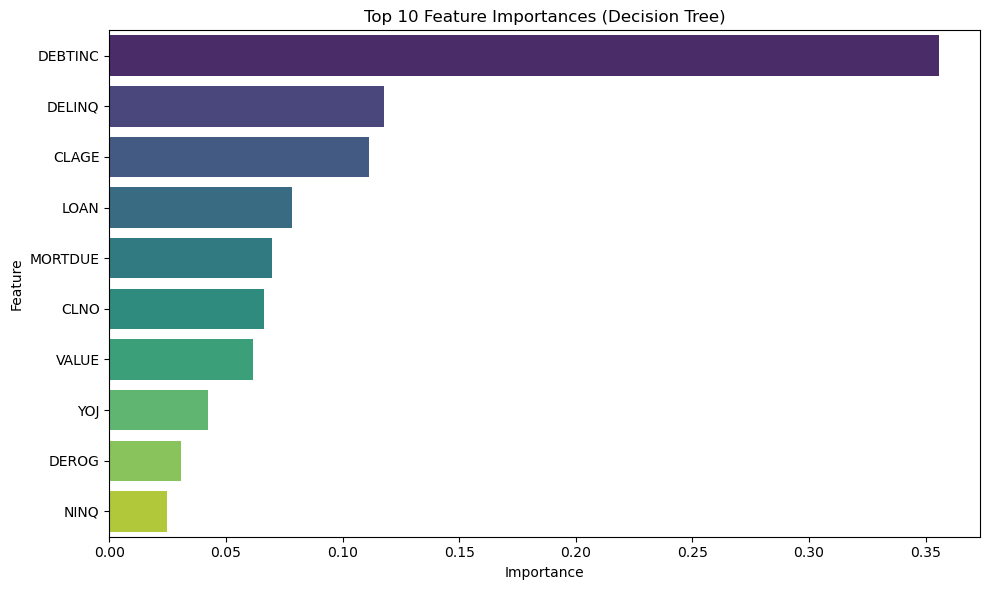

In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = tree_model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X_tree.columns, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.tight_layout()
plt.show()


### **Decision Tree - Hyperparameter Tuning**



In [437]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Base model
dt = DecisionTreeClassifier(random_state=42)

# Parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_leaf_nodes': [None, 10, 20, 50]
}

# Grid search
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train_tree, y_train_tree)
best_tree = grid_dt.best_estimator_

print("Best Parameters:", grid_dt.best_params_)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'max_depth': 7, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [439]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Training predictions
y_train_pred = best_tree.predict(X_train_tree)
y_train_proba = best_tree.predict_proba(X_train_tree)[:, 1]

# Test predictions
y_test_pred = best_tree.predict(X_test_tree)
y_test_proba = best_tree.predict_proba(X_test_tree)[:, 1]

# --- Train Evaluation ---
print("\n📘 Training Performance")
print("Confusion Matrix:\n", confusion_matrix(y_train_tree, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train_tree, y_train_pred))
print("ROC AUC (Train):", roc_auc_score(y_train_tree, y_train_proba))

# --- Test Evaluation ---
print("\n📗 Test Performance")
print("Confusion Matrix:\n", confusion_matrix(y_test_tree, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test_tree, y_test_pred))
print("ROC AUC (Test):", roc_auc_score(y_test_tree, y_test_proba))



📘 Training Performance
Confusion Matrix:
 [[3643  174]
 [ 282  669]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      3817
           1       0.79      0.70      0.75       951

    accuracy                           0.90      4768
   macro avg       0.86      0.83      0.84      4768
weighted avg       0.90      0.90      0.90      4768

ROC AUC (Train): 0.9133808929943441

📗 Test Performance
Confusion Matrix:
 [[901  53]
 [ 97 141]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       954
           1       0.73      0.59      0.65       238

    accuracy                           0.87      1192
   macro avg       0.81      0.77      0.79      1192
weighted avg       0.87      0.87      0.87      1192

ROC AUC (Test): 0.8799548121135247


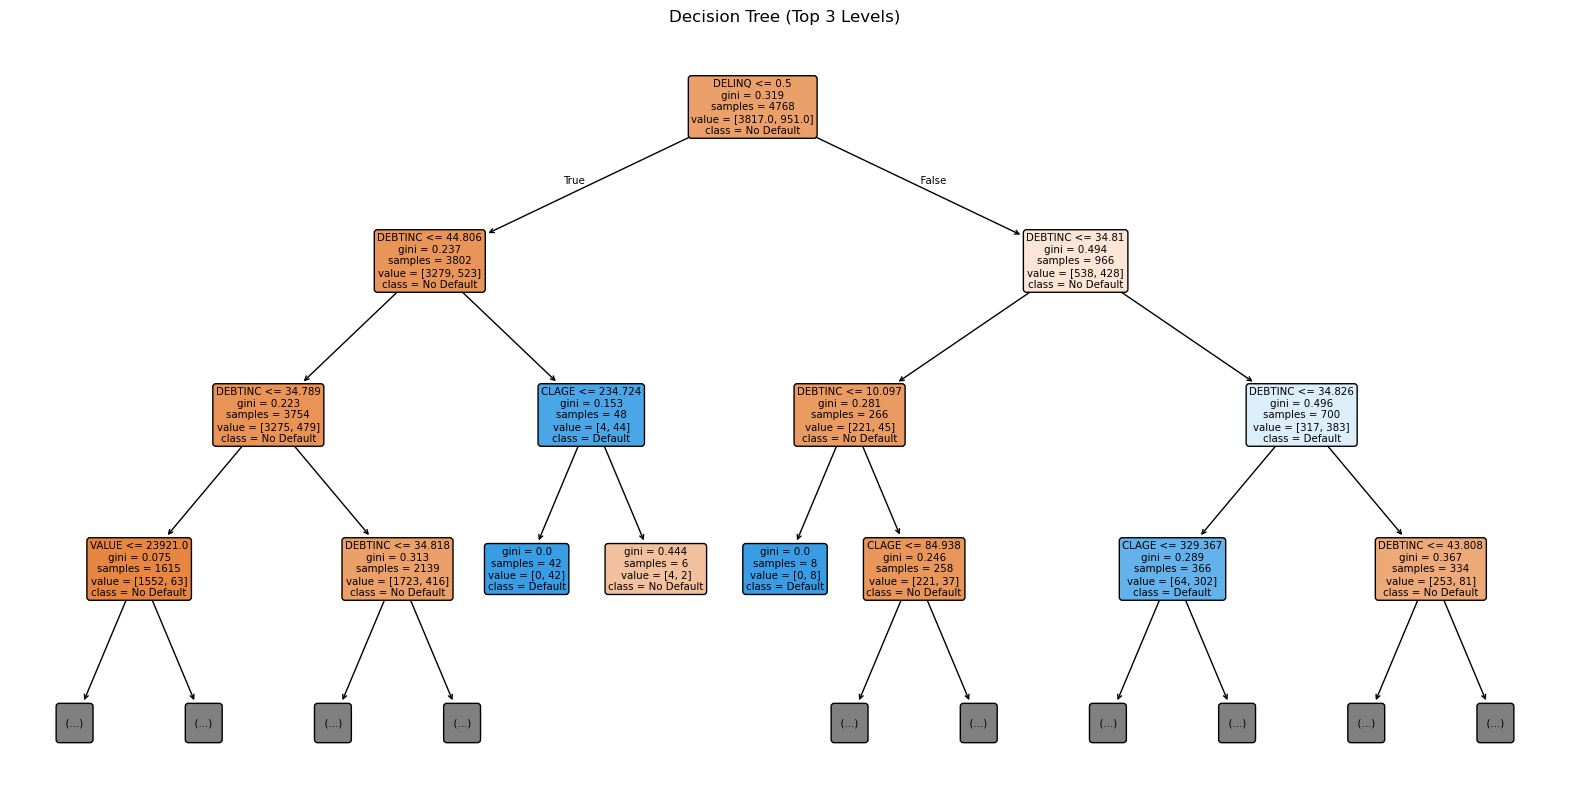

In [441]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_tree,
          feature_names=X_train_tree.columns,
          class_names=['No Default', 'Default'],
          filled=True,
          rounded=True,
          max_depth=3)  # show only top 3 levels for clarity
plt.title("Decision Tree (Top 3 Levels)")
plt.show()


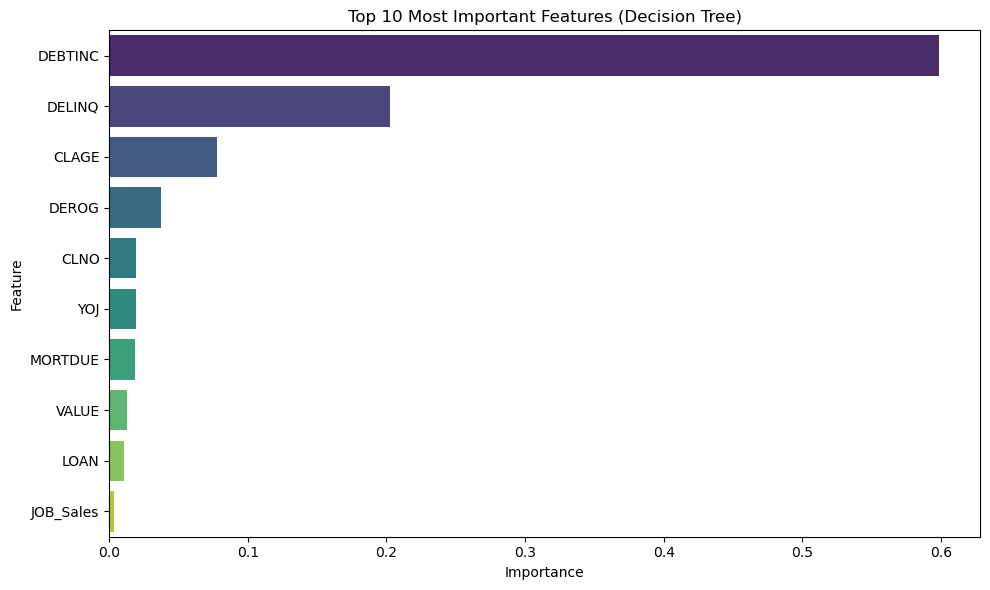

In [443]:
import pandas as pd
import seaborn as sns

# Get importances
importances = best_tree.feature_importances_
feat_df = pd.DataFrame({
    'Feature': X_train_tree.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Most Important Features (Decision Tree)")
plt.tight_layout()
plt.show()


In [457]:
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

def tune_threshold_and_evaluate(model, X_train, y_train, X_test, y_test, model_name="Model"):
    # Probabilities
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # --- Threshold tuning on training set ---
    precision, recall, thresholds = precision_recall_curve(y_train, y_train_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precision[:-1], label="Precision")
    plt.plot(thresholds, recall[:-1], label="Recall")
    plt.axvline(x=best_threshold, color='gray', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"{model_name}: Precision and Recall vs Threshold")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"🔍 {model_name} - Best threshold (by F1): {best_threshold:.3f}")

    # --- Evaluation ---
    def evaluate_split(y_true, y_pred, y_proba, split):
        print(f"\n📘 {model_name} - {split} Performance")
        print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
        print("\nClassification Report:\n", classification_report(y_true, y_pred))
        print("ROC AUC:", roc_auc_score(y_true, y_proba))
        print("F1 Score:", f1_score(y_true, y_pred))

    # Apply threshold
    y_train_pred = (y_train_proba >= best_threshold).astype(int)
    y_test_pred = (y_test_proba >= best_threshold).astype(int)

    # Evaluate
    evaluate_split(y_train, y_train_pred, y_train_proba, "Train")
    evaluate_split(y_test, y_test_pred, y_test_proba, "Test")

    return best_threshold


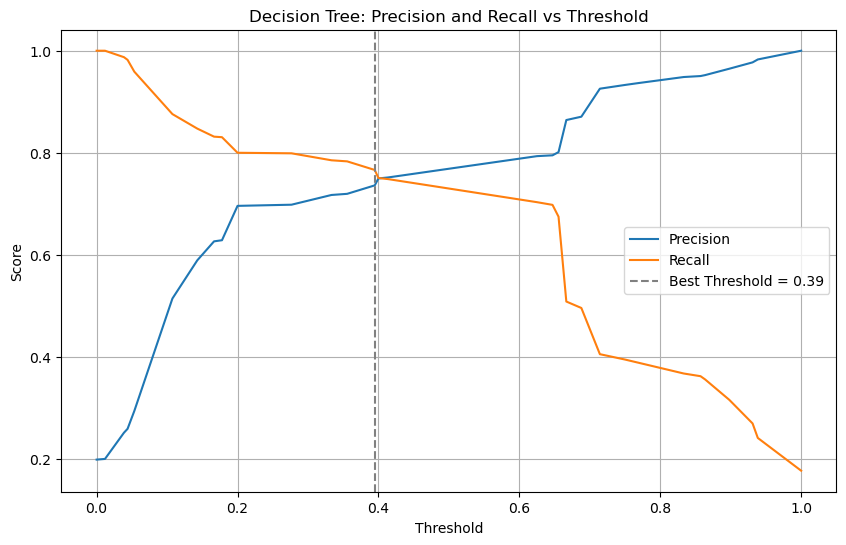

🔍 Decision Tree - Best threshold (by F1): 0.395

📘 Decision Tree - Train Performance
Confusion Matrix:
 [[3556  261]
 [ 222  729]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      3817
           1       0.74      0.77      0.75       951

    accuracy                           0.90      4768
   macro avg       0.84      0.85      0.84      4768
weighted avg       0.90      0.90      0.90      4768

ROC AUC: 0.9133808929943441
F1 Score: 0.7511591962905718

📘 Decision Tree - Test Performance
Confusion Matrix:
 [[883  71]
 [ 70 168]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       954
           1       0.70      0.71      0.70       238

    accuracy                           0.88      1192
   macro avg       0.81      0.82      0.82      1192
weighted avg       0.88      0.88      0.88      1192

ROC AUC: 0.8799548121135247
F1

In [459]:
dt_threshold = tune_threshold_and_evaluate(
    best_tree,
    X_train_tree, y_train_tree,
    X_test_tree, y_test_tree,
    model_name="Decision Tree"
)


### **Building a Random Forest Classifier**



In [445]:
from sklearn.ensemble import RandomForestClassifier

# Basic model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tree, y_train_tree)


RandomForestClassifier(random_state=42)

In [447]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict
y_train_pred_rf = rf_model.predict(X_train_tree)
y_test_pred_rf = rf_model.predict(X_test_tree)

# Probabilities
y_train_proba_rf = rf_model.predict_proba(X_train_tree)[:, 1]
y_test_proba_rf = rf_model.predict_proba(X_test_tree)[:, 1]

# --- Train evaluation ---
print("\n📘 Random Forest - Training Performance")
print("Confusion Matrix:\n", confusion_matrix(y_train_tree, y_train_pred_rf))
print("\nClassification Report:\n", classification_report(y_train_tree, y_train_pred_rf))
print("ROC AUC (Train):", roc_auc_score(y_train_tree, y_train_proba_rf))

# --- Test evaluation ---
print("\n📗 Random Forest - Test Performance")
print("Confusion Matrix:\n", confusion_matrix(y_test_tree, y_test_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_tree, y_test_pred_rf))
print("ROC AUC (Test):", roc_auc_score(y_test_tree, y_test_proba_rf))



📘 Random Forest - Training Performance
Confusion Matrix:
 [[3817    0]
 [   0  951]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768

ROC AUC (Train): 1.0

📗 Random Forest - Test Performance
Confusion Matrix:
 [[929  25]
 [ 86 152]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       954
           1       0.86      0.64      0.73       238

    accuracy                           0.91      1192
   macro avg       0.89      0.81      0.84      1192
weighted avg       0.90      0.91      0.90      1192

ROC AUC (Test): 0.9612467628560858


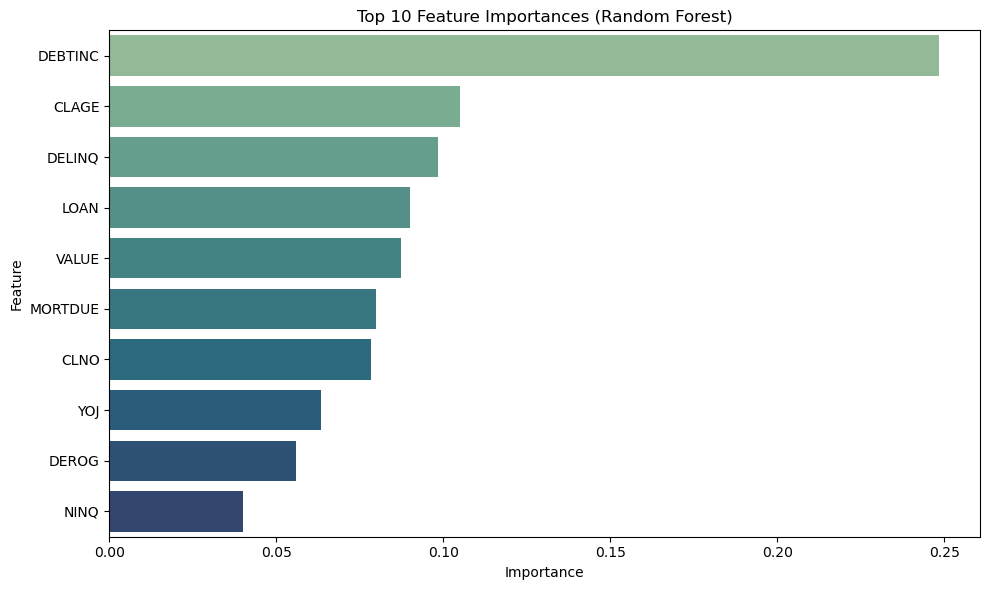

In [449]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature importances
importances_rf = rf_model.feature_importances_
feat_df_rf = pd.DataFrame({
    'Feature': X_tree.columns,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df_rf, x='Importance', y='Feature', palette='crest')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


### **Random Forest Classifier Hyperparameter Tuning**

In [451]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Base model
rf = RandomForestClassifier(random_state=42)

# Grid of hyperparameters
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}


In [453]:
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_tree, y_train_tree)
best_rf = grid_rf.best_estimator_

print("✅ Best Parameters:", grid_rf.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
✅ Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [454]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train predictions
y_train_pred_rf = best_rf.predict(X_train_tree)
y_train_proba_rf = best_rf.predict_proba(X_train_tree)[:, 1]

# Test predictions
y_test_pred_rf = best_rf.predict(X_test_tree)
y_test_proba_rf = best_rf.predict_proba(X_test_tree)[:, 1]

# --- Train ---
print("\n📘 Tuned RF - Training Performance")
print("Confusion Matrix:\n", confusion_matrix(y_train_tree, y_train_pred_rf))
print("\nClassification Report:\n", classification_report(y_train_tree, y_train_pred_rf))
print("ROC AUC (Train):", roc_auc_score(y_train_tree, y_train_proba_rf))

# --- Test ---
print("\n📗 Tuned RF - Test Performance")
print("Confusion Matrix:\n", confusion_matrix(y_test_tree, y_test_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_tree, y_test_pred_rf))
print("ROC AUC (Test):", roc_auc_score(y_test_tree, y_test_proba_rf))



📘 Tuned RF - Training Performance
Confusion Matrix:
 [[3817    0]
 [   1  950]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768

ROC AUC (Train): 1.0

📗 Tuned RF - Test Performance
Confusion Matrix:
 [[931  23]
 [ 87 151]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       954
           1       0.87      0.63      0.73       238

    accuracy                           0.91      1192
   macro avg       0.89      0.81      0.84      1192
weighted avg       0.91      0.91      0.90      1192

ROC AUC (Test): 0.9601787255782815


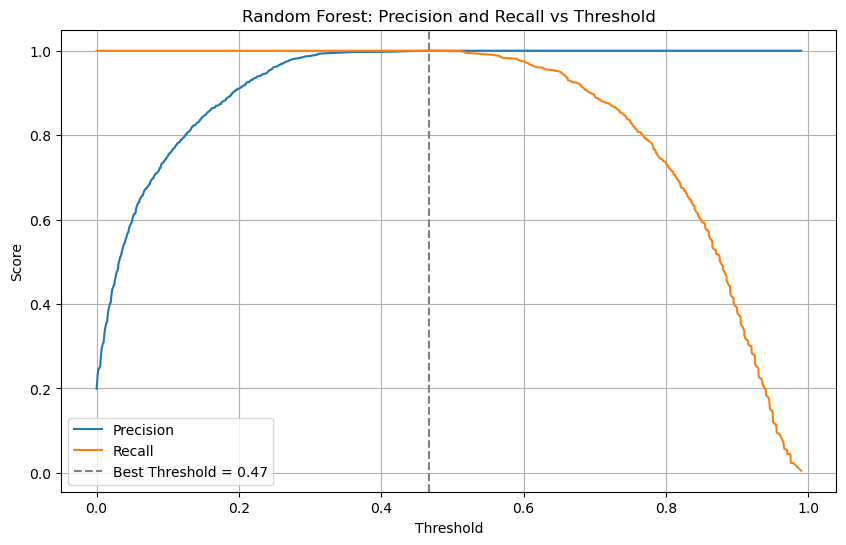

🔍 Random Forest - Best threshold (by F1): 0.467

📘 Random Forest - Train Performance
Confusion Matrix:
 [[3817    0]
 [   0  951]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768

ROC AUC: 1.0
F1 Score: 1.0

📘 Random Forest - Test Performance
Confusion Matrix:
 [[923  31]
 [ 77 161]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       954
           1       0.84      0.68      0.75       238

    accuracy                           0.91      1192
   macro avg       0.88      0.82      0.85      1192
weighted avg       0.91      0.91      0.91      1192

ROC AUC: 0.9601787255782815
F1 Score: 0.7488372093023256


In [461]:
rf_threshold = tune_threshold_and_evaluate(
    best_rf,
    X_train_tree, y_train_tree,
    X_test_tree, y_test_tree,
    model_name="Random Forest"
)


# Problem and Solution Summary
Loan defaults create severe financial threats for lending institutions that lead to reduced profitability and unstable business operations. The current credit evaluation methods struggle to maintain both size and precision when processing large numbers of applicants. The project resolves this problem through machine learning models which forecast loan default probabilities before loan approval occurs.

A tuned Random Forest classifier with optimized thresholding functions as the final proposed solution to meet business requirements. We selected Random Forest because it provides strong capabilities for detecting complex patterns and non-linear relationships between variables. The three key variables that influenced all models included DEBTINC, CLAGE, and DELINQ because they measure credit behavior and financial stability.

The F1-score served as the main evaluation metric to guide threshold optimization because it represents the balance between incorrect positive and negative predictions. The essential requirement in a high-stakes lending domain involves minimizing incorrect rejections as well as missed defaulters. The Random Forest model achieved better results for this evaluation task.

The organization obtains a flexible automated risk evaluation system through the implementation of this model which leads to better accuracy and reduced losses while strengthening loan portfolio wellness.

# Recommendations for Implementation
Key Actions:

The refined Random Forest model should be integrated as part of loan underwriting operational processes.

The model-generated probabilities should function together with human evaluation to make final approval choices.

A decision threshold must be set to optimize F1-score performance because it helps avoid both business losses from defaulter misses and overly cautious lending decisions.

Benefits:

The system enhances its ability to find high-risk borrowers.

Reduced default rates and improved profitability.

Faster, consistent, and scalable loan evaluation.

Expected Costs:

Development and infrastructure for real-time scoring.

Organizations must train their staff members to understand both the usage and interpretation of the developed model.

The system requires maintenance and needs periodic updates when new available data emerges.

Risks & Mitigation:

To combat model drift organizations should use monitoring systems and establish regular model training schedules.

To address interpretability challenges organizations should implement explainability tools such as SHAP to fulfill regulatory requirements and internal compliance needs.

The audit process should focus on fairness and protect protected groups from discriminatory model decisions.

Further Analysis:

The model should incorporate additional data from credit bureaus and alternative external sources.

The implementation should analyze segmentation approaches that distinguish between housing loans and personal loans.

The model should undergo performance evaluation while its features receive continuous refinement throughout time.